<a href="https://colab.research.google.com/github/bcataldo3/plantilla_curso_python/blob/main/docs/Clase_09 - R - PCA - Caso Estudio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA - Caso de Estudio
   
El set de datos ``USArrests`` del paquete básico de ``R`` contiene el porcentaje de asaltos (``Assault``), asesinatos (``Murder``) y secuestros (``Rape``) por cada 100,000 habitantes para cada uno de los 50 estados de USA (1973). Además, también incluye el porcentaje de la población de cada estado que vive en zonas rurales (``UrbanPoP``).

In [1]:
data("USArrests")
head(USArrests)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


El promedio de los datos muestra que hay tres veces más secuestros que asesinatos y 8 veces más asaltos que secuestros.

In [2]:
apply(X = USArrests, MARGIN = 2, FUN = mean)

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

La varianza es muy distinta entre las variables, en el caso de Assault, la varianza es varios órdenes de magnitud superior al resto.

In [3]:
apply(X = USArrests, MARGIN = 2, FUN = var)

Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

Si no se estandarizan las variables para que tengan media cero y desviación estándar 1 antes de realizar el estudio PCA, la variable Assault dominará la mayoría de las componentes principales.

La función ``prcomp()`` es una de las múltiples funciones en ``R`` que realizan PCA. Por defecto, ``prcomp()`` centra las variables para que tengan media cero, pero si se quiere además que su desviación estándar sea de uno, hay que indicar ``scale = TRUE``.

In [4]:
pca <- prcomp(USArrests, scale = TRUE)
names(pca)

[1] "sdev"     "rotation" "center"   "scale"    "x"

``rotation`` contiene el valor de los loadings $ϕ$ para cada componente (eigenvector). El número máximo de componentes principales se corresponde con el mínimo($n-1$,$p$), que en este caso es $min(49,4)=4$

In [5]:
pca$rotation

,PC1,PC2,PC3,PC4
Murder,-0.5358995,-0.4181809,0.3412327,0.64922780
Assault,-0.5831836,-0.1879856,0.2681484,-0.74340748
UrbanPop,-0.2781909,0.8728062,0.3780158,0.13387773
Rape,-0.5434321,0.1673186,-0.8177779,0.08902432


Analizar con detalle el vector de loadings que forma cada componente puede ayudar a interpretar que tipo de información recoge cada una de ellas. Por ejemplo, la primera componente es el resultado de la siguiente combinación lineal de las variables originales:

$$PC1=−0.5358995 Murder−0.5831836 Assault−0.2781909 UrbanPop−0.5434321 Rape$$

Los pesos asignados en la primera componente a las variables ``Assault``, ``Murder`` y ``Rape`` son aproximadamente iguales entre ellos y bastante superiores al asignado a UrbanPoP, esto significa que la primera componente recoge mayoritariamente la información correspondiente a los delitos. En la segunda componente, es la variable UrbanPoP la que tiene con diferencia mayor peso, por lo que se corresponde principalmente con el nivel de urbanización del estado. Si bien en este ejemplo la interpretación de las componentes es bastante clara, no en todos los casos ocurre lo mismo.

La función ``prcomp()`` calcula automáticamente el valor de las componentes principales para cada observación (principal component scores) multiplicando los datos por los vectores de loadings. El resultado se almacena en la matriz x.

In [6]:
head(pca$x)

,PC1,PC2,PC3,PC4
Alabama,-0.9756604,-1.1220012,0.43980366,0.154696581
Alaska,-1.9305379,-1.0624269,-2.01950027,-0.434175454
Arizona,-1.7454429,0.7384595,-0.05423025,-0.826264240
Arkansas,0.1399989,-1.1085423,-0.11342217,-0.180973554
California,-2.4986128,1.5274267,-0.59254100,-0.338559240
Colorado,-1.4993407,0.9776297,-1.08400162,0.001450164


Mediante la función ``biplot()`` se puede obtener una representación bidimensional de las dos primeras componentes. Es recomendable indicar el argumento ``scale = 0`` para que las flechas estén en la misma escala que las componentes.

Una vez calculadas las componentes principales, se puede conocer la varianza explicada por cada una de ellas, la proporción respecto al total y la proporción de varianza acumulada.

In [7]:
library(ggplot2)
pca$sdev^2

[1] 2.4802416 0.9897652 0.3565632 0.1734301

In [8]:
prop_varianza <- pca$sdev^2 / sum(pca$sdev^2)
prop_varianza

[1] 0.62006039 0.24744129 0.08914080 0.04335752

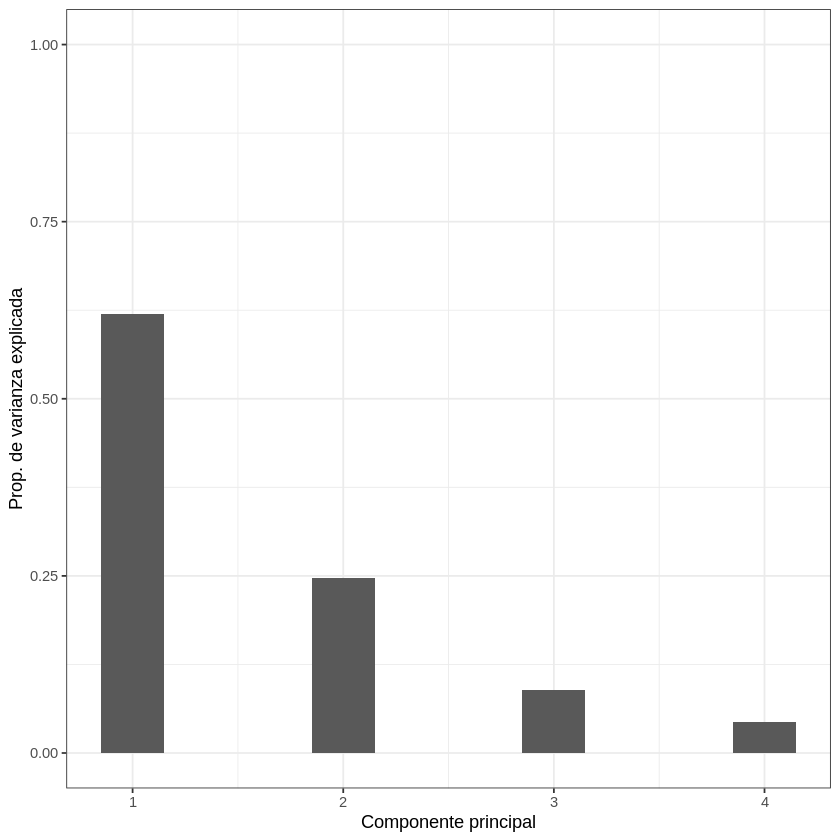

In [9]:
ggplot(data = data.frame(prop_varianza, pc = 1:4),
       aes(x = pc, y = prop_varianza)) +
  geom_col(width = 0.3) +
  scale_y_continuous(limits = c(0,1)) +
  theme_bw() +
  labs(x = "Componente principal",
       y = "Prop. de varianza explicada")

In [10]:
prop_varianza_acum <- cumsum(prop_varianza)
prop_varianza_acum

[1] 0.6200604 0.8675017 0.9566425 1.0000000

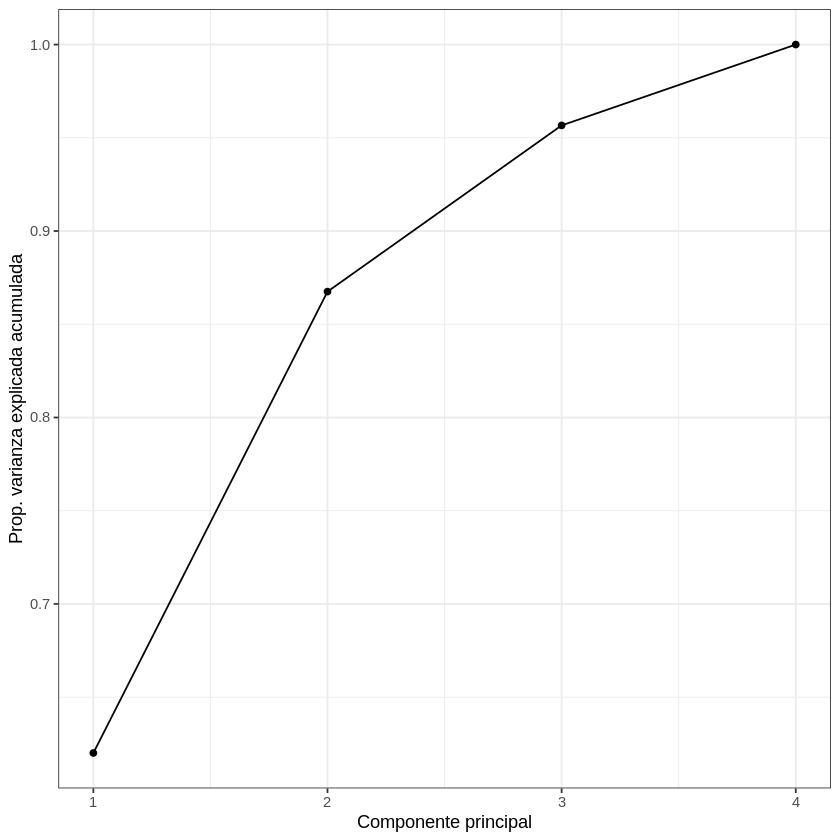

In [11]:
ggplot(data = data.frame(prop_varianza_acum, pc = 1:4),
       aes(x = pc, y = prop_varianza_acum, group = 1)) +
  geom_point() +
  geom_line() +
  theme_bw() +
  labs(x = "Componente principal",
       y = "Prop. varianza explicada acumulada")

En este caso, la primera componente explica el 62% de la varianza observada en los datos y la segunda el 24.7%. Las dos últimas componentes no superan por separado el 1% de varianza explicada. Si se empleasen únicamente las dos primeras componentes se conseguiría explicar el 86.75% de la varianza observada.